<a href="https://colab.research.google.com/github/DLPietro/learning-roadmap/blob/main/notebooks/day_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 7 – Data Visualization for Finance

Main Goals

- Plotting and compare multiple assets in a chart
- Financial visualisation: comparing trends between assets
- Correlation: how to calculate and plot it


1) Preparatory Exercise - First Plot

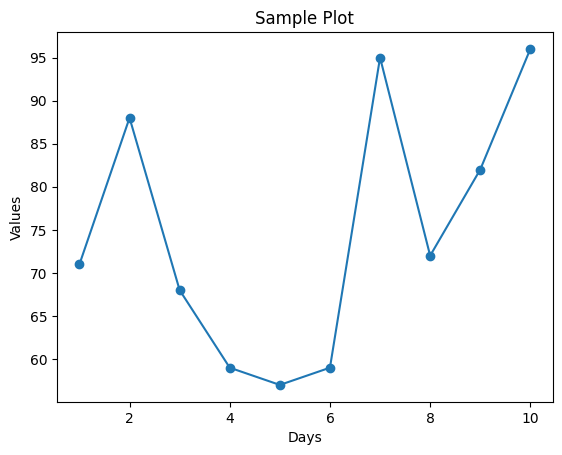

In [ ]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np

# Sample a dataset
days = np.arange(1, 11)
values = np.random.randint(50, 100, size = 10)

plt.plot(days, values, marker = "o")
plt.title("Sample Plot")
plt.xlabel("Days")
plt.ylabel("Values")
plt.show()

2) Main Task – Financial Visualization

/tmp/ipython-input-1698333686.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period = "90d")
[*********************100%***********************]  3 of 3 completed


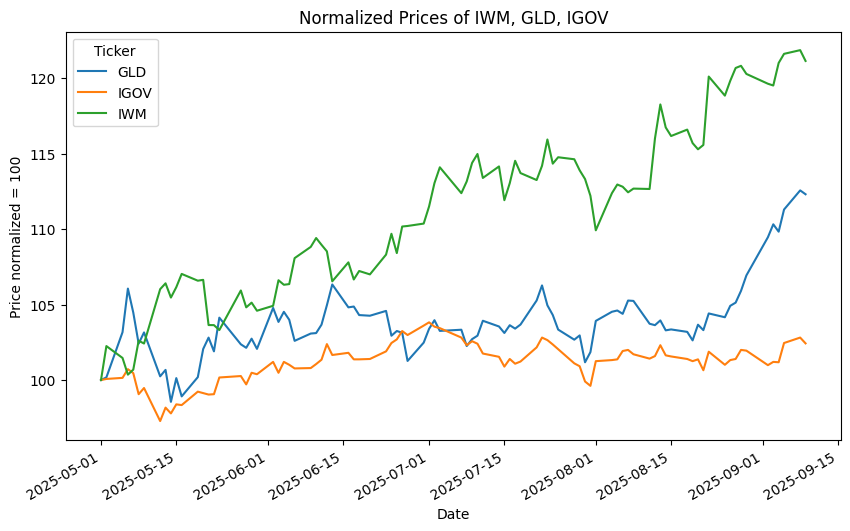

In [ ]:
import yfinance as yf

# Step 1: downloading financial data
tickers = ["IWM", "GLD", "IGOV"]
data = yf.download(tickers, period = "90d")

# Step 2: selecting close prices and normalization
normalized_prices = data["Close"] / data["Close"].iloc[0] * 100

# Step 3: plot normalized prices
normalized_prices.plot(figsize=(10, 6), title = "Normalized Prices of IWM, GLD, IGOV")
plt.xlabel("Date")
plt.ylabel("Price normalized = 100")
plt.show()

3) Consolidation Exercise - Calculate Correlation and Plot

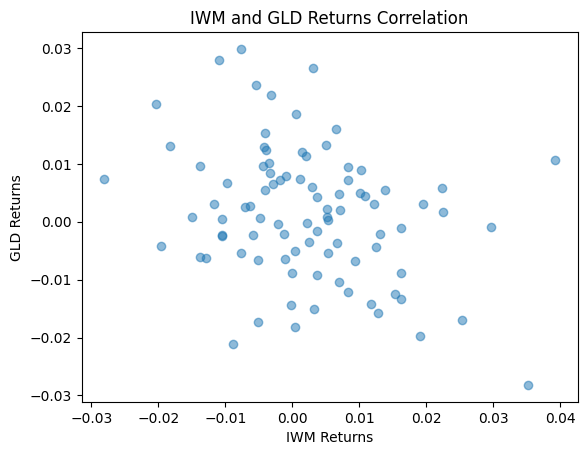

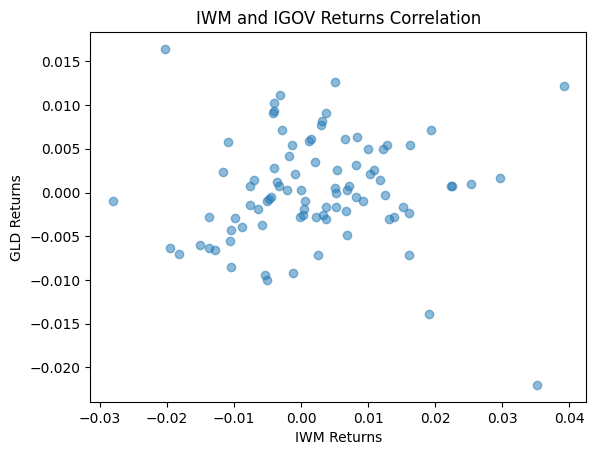

Ticker       GLD      IGOV       IWM
Ticker                              
GLD     1.000000  0.565416 -0.296243
IGOV    0.565416  1.000000  0.038841
IWM    -0.296243  0.038841  1.000000


In [ ]:
# Step 4: Daily Returns
daily_returns = data["Close"].pct_change().dropna()

# Step 5: IWM vs GLD correlation between 2 assets plot, and then IWM vs IGOV
plt.scatter(daily_returns["IWM"], daily_returns["GLD"], alpha=0.5)
plt.title("IWM and GLD Returns Correlation")
plt.xlabel("IWM Returns")
plt.ylabel("GLD Returns")
plt.show()

plt.scatter(daily_returns["IWM"], daily_returns["IGOV"], alpha=0.5)
plt.title("IWM and IGOV Returns Correlation")
plt.xlabel("IWM Returns")
plt.ylabel("GLD Returns")
plt.show()

# Step 6: Correlation Matrix Calculation
correlation = daily_returns.corr()
print(correlation)